# Прокофьев Игорь Витальевич
## Группа ДПИ22-1м
## Семинар 3, вариант 1

###Задание 1  
Построить графики функци  
$f(x)=sin⁡(x)⋅(5-x); \quad x∈(-10,10); \quad шаг=0,3$  
Отобразить сетку. До значения 0 цвет – красный, после – синий.

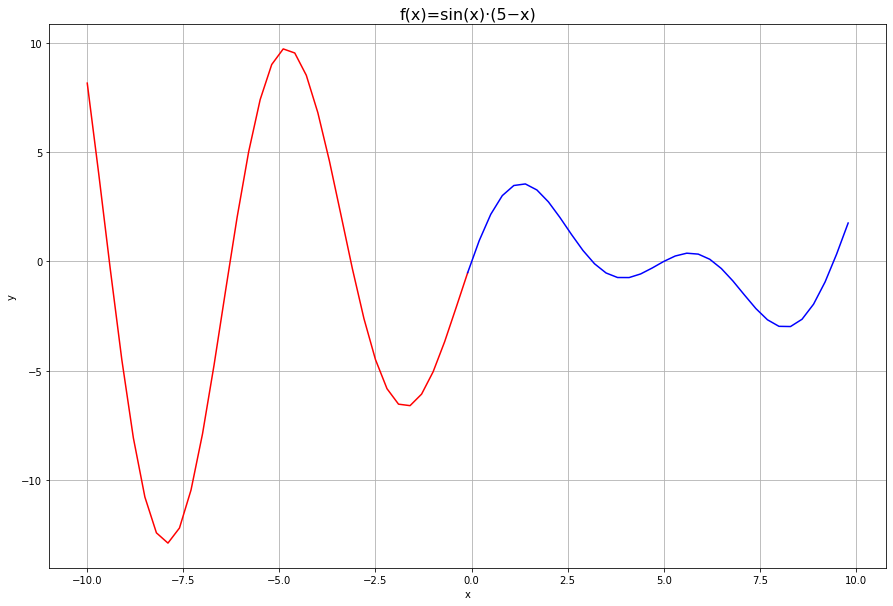

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация данны
x = np.arange(-10, 10, 0.3)
y = np.array(np.sin(x)*(5-x))

# Первый вариант закрашивания графика
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.title('f(x)=sin(x)⋅(5−x)', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x[:34], y[:34], color='red')
plt.plot(x[33:], y[33:], color='blue')

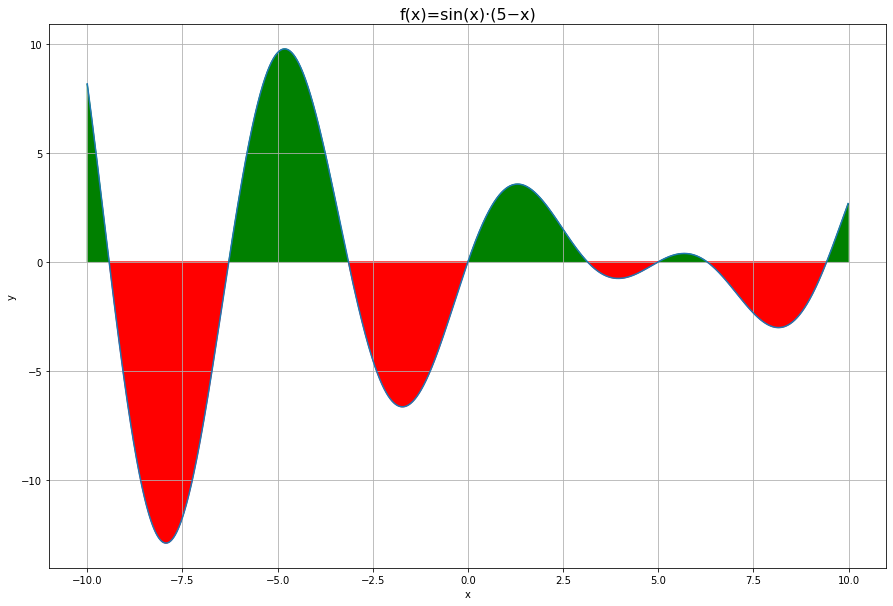

In [2]:
# Генерация данных с меньшим шагом, необходимо для более
# плавной заливки областей между графиком и осью абсцисс 
x = np.arange(-10, 10, 0.01)
y = np.array(np.sin(x)*(5-x))

# Второй вариан закрашивания графика
plt.figure(figsize=(15, 10))
plt.title('f(x)=sin(x)⋅(5−x)', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x, y)
plt.fill_between(x, y, where=y < 0, color='red')
plt.fill_between(x, y, where=y > 0, color='green')

###Задание 2  

Напишите программу, которая будет создавать читать данные из файла CSV и выводить их на экран в виде графика. Вывести «легенду» к графикам. Отобразить на графике сетку.


Название файла – cities.csv  
Построить графики по столбцам: LatD, LonD.  
Цвета графиков: красный, зеленый.  
Тип графиков: сплошная линия, точки


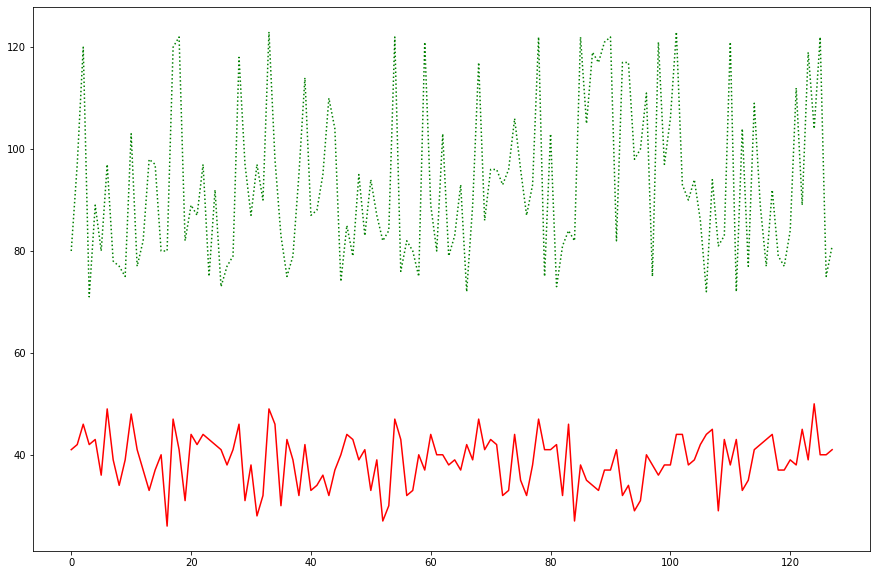

In [3]:
# https://campus.fa.ru/mod/folder/download_folder.php?id=351804
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('cities.csv', skipinitialspace=True)

plt.figure(figsize=(15, 10))
plt.plot(data.LatD, color='red',  linestyle='solid')
plt.plot(data.LonD, color='green', linestyle='dotted')

###Задание 3  

Загрузить данные из текстового файла sig0001 (столбцы 1 и 2).  
Вывести данные на экран, одновременно из двух столбцов. Оси подписать.  Подписать значения по оси x – время.  
Вывести легенду.  




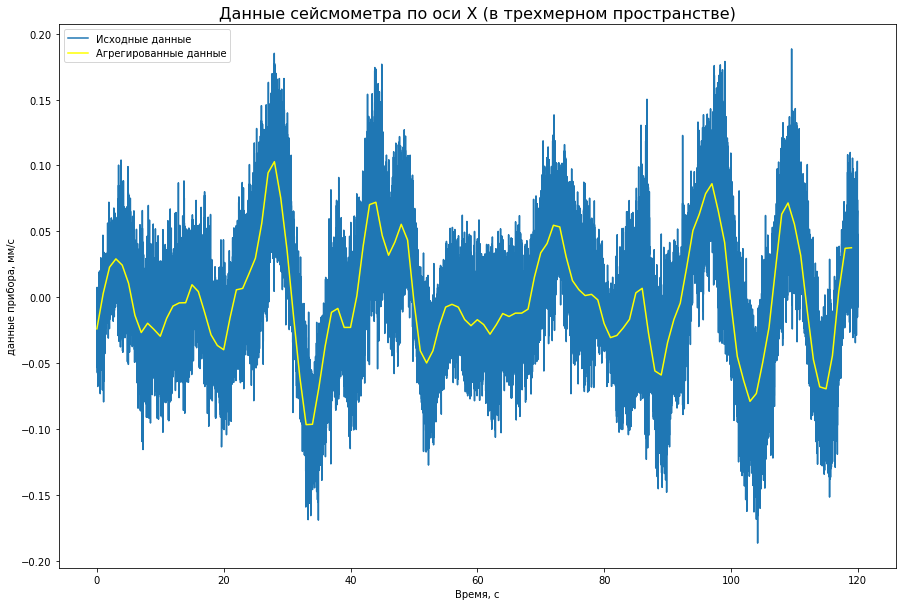

In [4]:
# https://campus.fa.ru/mod/folder/download_folder.php?id=351804
import matplotlib.pyplot as plt
import pandas as pd

# В исходном файле используется специфичный формат хранения заголовков.
# Судя по оригинальным названиям колонок это файл с данными измерений
# короткопериодного сейсмометра ZET 7156, который состоит из трех каналов
# (по умолчанию они имеют названия: «ZET7156-X», «ZET7156-Y», «ZET7156-Z»)
# Поэтому мы пропустим первые строки файла и введем собственные названия строк

data = pd.read_table('sig0001.txt', encoding='utf-8', skiprows=3, \
                     names=('time', 'axis_x', 'axis_y', 'axis_z'), decimal=',')

# Для наглядности сделаем второй график где вместо 60 тыс строк будет 120 строк
# Другими словами возьмем усредненные данные по целым секундам
data_agg = data.copy()
data_agg.time = data_agg.time.astype('int32')
data_agg = data_agg.groupby('time', as_index=False).aggregate({'axis_x':'mean'})


# Выводим график с параметрами согласно заданию
plt.figure(figsize=(15, 10))
plt.title('Данные сейсмометра по оси X (в трехмерном пространстве)', fontsize=16)
plt.xlabel('Время, с')
plt.ylabel('данные прибора, мм/с')
plt.plot(data.time, data.axis_x, label='Исходные данные')

plt.plot(data_agg.time, data_agg.axis_x, \
         label='Агрегированные данные', color='yellow')
plt.legend()